### 0. Adjustable Parameters of this Analysis:
* Dropping unknown HUGO genes
* Handling NAN's: drop, use mean/median, or impute based on similar expression (or complimentary samples from same patient)?
* Scaling - Do I want to z-score normalize?
* Perplexity

## 1. Import Packages

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import Data

In [28]:
raw_expression = pd.read_csv('Team_4_STAD/TCGA.STAD.expression.txt', sep='\t')
metadata = pd.read_csv('Team_4_STAD/TCGA.STAD.metadata.txt', sep='\t')

id_cols = raw_expression.iloc[:, :2]

## 3. Preprocessing
* Drop columns without HUGO symbol (contain "?")
* Imputate NAN values (KNN)
* log2 scaling
* z-score normalization?

In [30]:
columns_to_drop = [col for col in raw_expression.columns if "?" in col]
raw_expression = raw_expression.drop(columns=columns_to_drop, axis=1)

expression_values = raw_expression.iloc[:, 2:]

imputer = KNNImputer(n_neighbors=5)
imputed_expression = imputer.fit_transform(expression_values)

log2_expression = np.log2(imputed_expression + 1)

scaler = StandardScaler()
scaled_expression = scaler.fit_transform(log2_expression) # Not sure if I should z-score normalize?

## 4. t-SNE embedding merged with metadata
* Tumor status
* Sex
* Ethnicity
* Histological Type
* Stage

In [31]:
# t-SNE embedding:
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
tsne_embedding = tsne.fit_transform(scaled_expression)

# Make into a DataFrame and re-attach IDs
tsne_df = pd.DataFrame(tsne_embedding, columns=['tSNE-1', 'tSNE-2'])
tsne_df = pd.concat([id_cols.reset_index(drop=True), tsne_df], axis=1)

merged = pd.merge(tsne_df, metadata, on='patient_id') # merge embedding with metadata

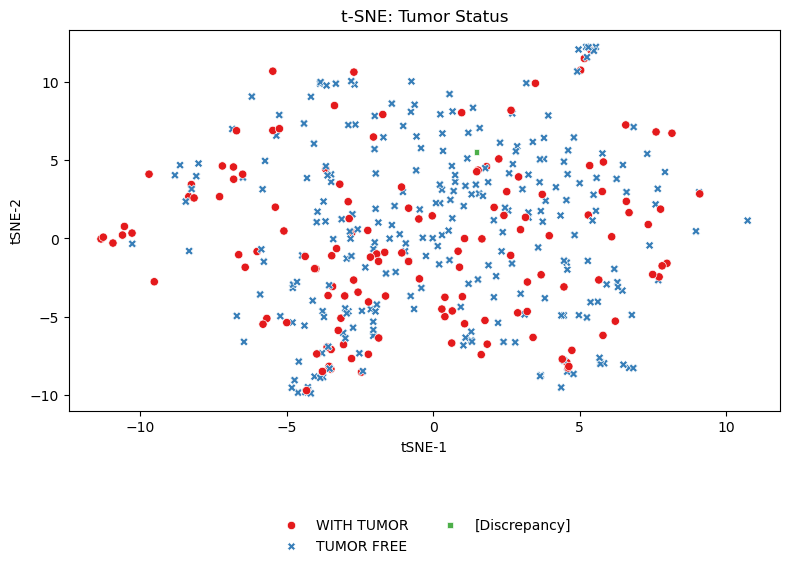

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x='tSNE-1', y='tSNE-2', hue='tumor_status', style='tumor_status', palette='Set1')
plt.title('t-SNE: Tumor Status')
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2, frameon=False) # below
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # to the right
plt.tight_layout()
plt.show()

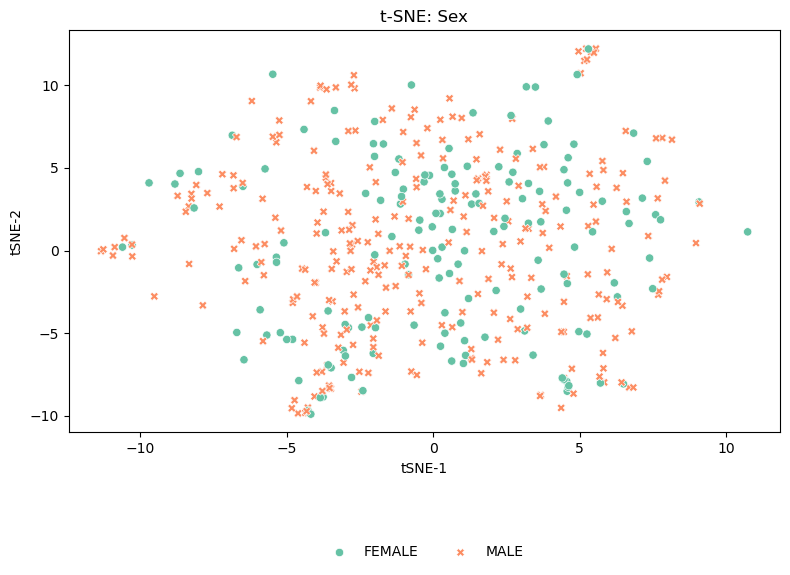

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x='tSNE-1', y='tSNE-2', hue='gender', style='gender', palette='Set2')
plt.title('t-SNE: Sex')
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2, frameon=False) # below
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # to the right
plt.tight_layout()
plt.show()

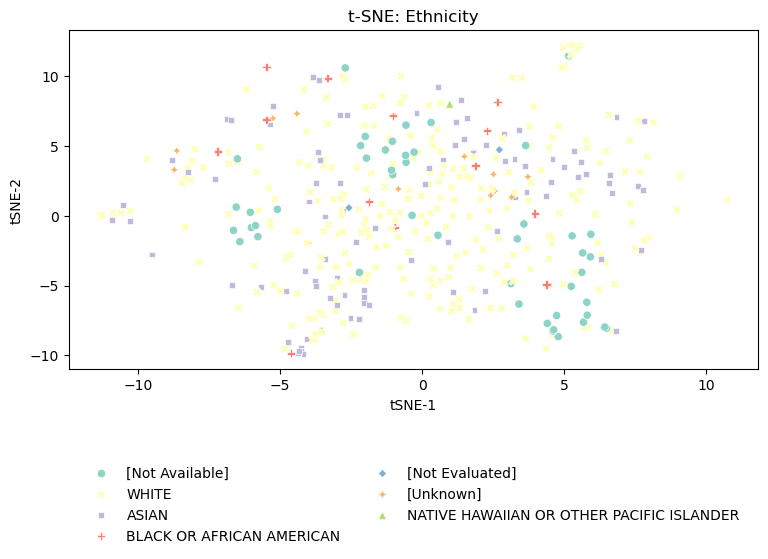

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x='tSNE-1', y='tSNE-2', hue='race', style='race', palette='Set3')
plt.title('t-SNE: Ethnicity')
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2, frameon=False) # below
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # to the right
plt.tight_layout()
plt.show()

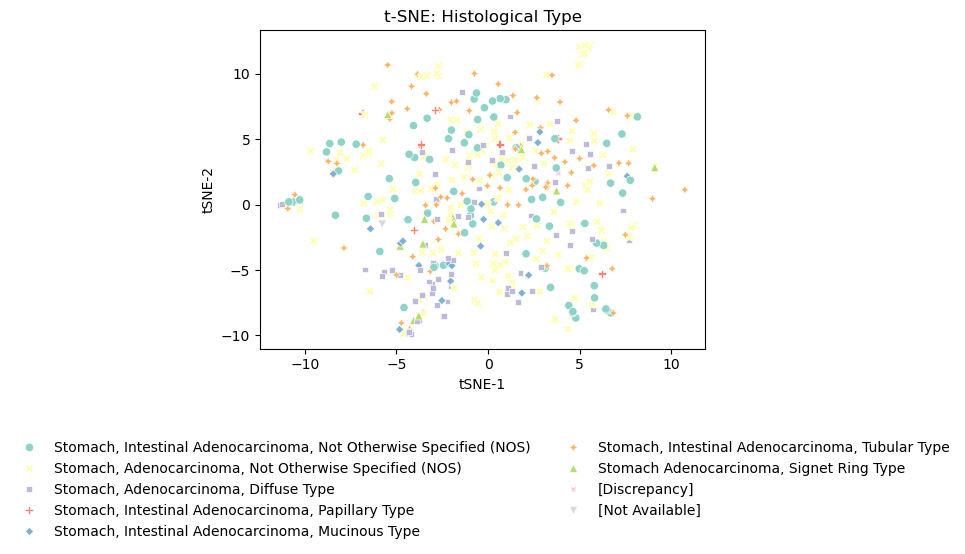

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x='tSNE-1', y='tSNE-2', hue='histological_type', style='histological_type', palette='Set3')
plt.title('t-SNE: Histological Type')
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2, frameon=False) # below
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # to the right
plt.tight_layout()
plt.show()

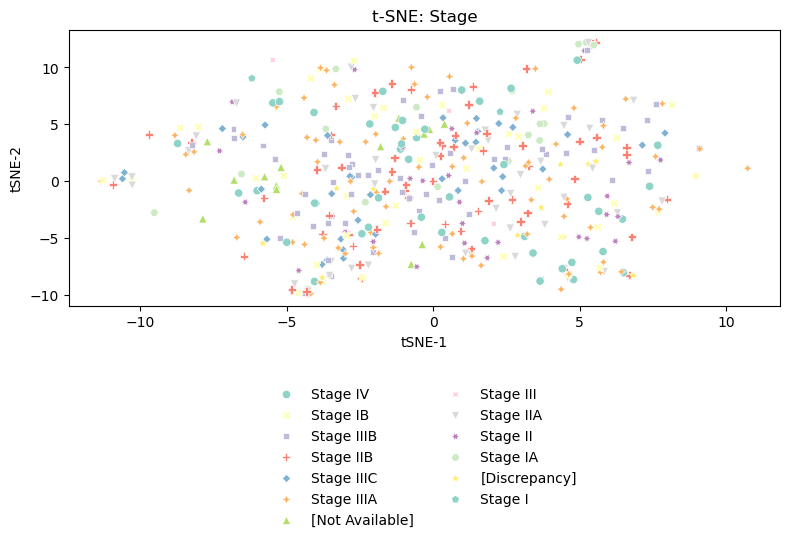

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x='tSNE-1', y='tSNE-2', hue='ajcc_pathologic_tumor_stage', style='ajcc_pathologic_tumor_stage', palette='Set3')
plt.title('t-SNE: Stage')
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=2, frameon=False) # below
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # to the right
plt.tight_layout()
plt.show()